In [ ]:
import numpy as np

from nonormalbrains.sprt import msprt
from nonormalbrains.sprt import n_trials

from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rc('axes', titlesize=16)

# MSRPT 

In Wald [1] proof for the optimality of the SPRT rests on the assumption of normal noise.

_But!_

In the brain nearly all variables of interest log-normal distributed, including the firing rate, Vm, and synaptic wieghts [2]. 

The MSRPT has been often dicussed as useful model of decision making in the basal ganglia [3]. 

However, if firing rates, membrane voltages, and wieghts are all log-normally ditribution, a key assumption needed for MSRPTs optimality is violated.

Optimality is not needed for any model to be a considered a 'good' model of neural activity, and many parametric tests are in practice robust to assumption violations. 

However _it does matter how much the predictions made assuming normal noise change when the actual noise is log-normal, which is what I test here._

Using some monte carlo experiments I compare how reaction times vary for Normal versus Log-normal noise using the MSPRT. 

In all runs means and sigmas are fixed and shared between the two noise models.

---

[1] https://en.wikipedia.org/wiki/Sequential_probability_ratio_test

[2] Buzsáki, G. & Mizuseki, K., 2014. The log-dynamic brain: how skewed distributions affect network operations. Nature reviews. Neuroscience, 15(4), pp.264–78. 

[3] Bogacz, R. & Gurney, K., 2007. The Basal Ganglia and Cortex Implement Optimal Decision Making Between Alternative Actions. Neural Computation, 477, pp.442–477.

In [177]:
seed_value = 42

# Params
sigma = 4
means = [4, 4.5] 

# Kluge optimal gain
u1 = np.max(means)
u2 = np.min(means)
g = u1 - u2  / sigma

# MSPRT threshold
C = 4  

# Number of sims
n = 1000

# Prevent inf loops 
max_iteration = 100

# Run experiments

In [154]:
Dnormal, RTnormal, Tnormal = n_trials(
    n, means, sigma, g, C, 
    mode='normal', save_traces=True, 
    seed_value=seed_value)

In [173]:
Dlognormal, RTlognormal, Tlognormal = n_trials(
    n, means, sigma, g, C, 
    mode='lognormal', save_traces=True, 
    seed_value=seed_value)

# Visulize (combined) noise

In [156]:
# Noise
Nnormal = []
for k, v in Tnormal.items():
    Nnormal.extend(v.flatten().tolist())
    
# Noise
Nlognormal = []
for k, v in Tlognormal.items():
    Nlognormal.extend(v.flatten().tolist())

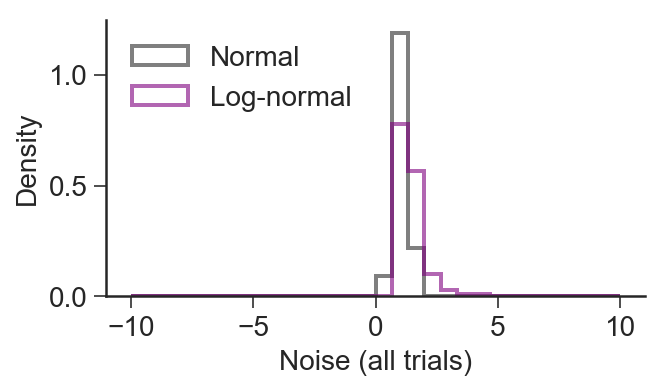

In [174]:
fig, ax = plt.subplots(1, figsize=(5, 3))
_ = plt.hist(Nnormal, color="black", alpha=0.5, label="Normal", 
    bins=30, range=(-10, 10), normed=True, histtype='step', linewidth=2)
_ = plt.hist(Nlognormal, color="purple", alpha=0.6, label="Log-normal", 
    bins=30, range=(-10, 10), normed=True, histtype='step', linewidth=2)

_ = ax.legend(loc='upper left')
_ = ax.set_xlabel("Noise (all trials)")
_ = ax.set_ylabel("Density")

# Tweaks
sns.despine()
_ = fig.tight_layout()

# Visualize reaction times

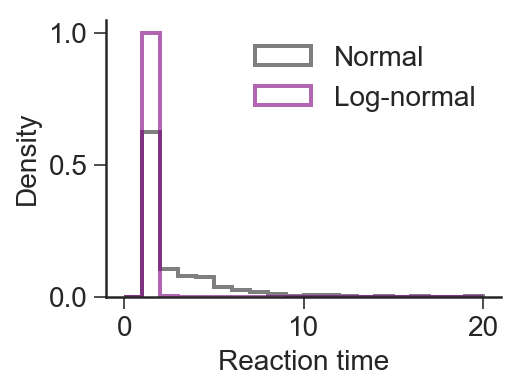

In [178]:
fig, ax = plt.subplots(1, figsize=(4, 3))
_ = plt.hist(RTnormal, color="black", alpha=0.5, label="Normal", 
    bins=20, range=(0, 20), normed=True, histtype='step', linewidth=2)
_ = plt.hist(RTlognormal, color="purple", alpha=0.6, label="Log-normal", 
    bins=20, range=(0, 20), normed=True, histtype='step', linewidth=2)

_ = ax.legend()
# _ = ax.set_xlim(1, 10)
# _ = ax.set_ylim(0, .25)
_ = ax.set_xlabel("Reaction time")
_ = ax.set_ylabel("Density")

# Tweaks
sns.despine()
_ = fig.tight_layout()

### Zoom in

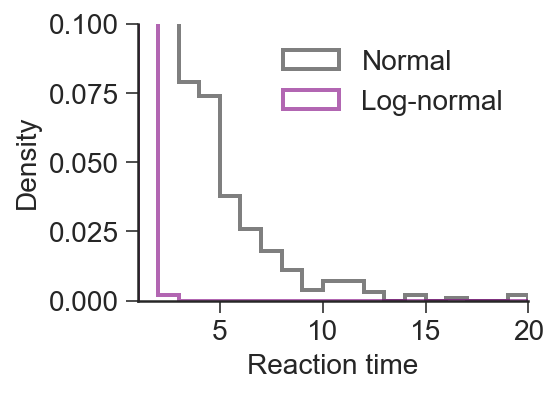

In [171]:
fig, ax = plt.subplots(1, figsize=(4, 3))
_ = plt.hist(RTnormal, color="black", alpha=0.5, label="Normal", 
    bins=20, range=(0, 20), normed=True, histtype='step', linewidth=2)
_ = plt.hist(RTlognormal, color="purple", alpha=0.6, label="Log-normal", 
    bins=20, range=(0, 20), normed=True, histtype='step', linewidth=2)

_ = ax.legend()
_ = ax.set_xlim(1, 20)
_ = ax.set_ylim(0, .1)
_ = ax.set_xlabel("Reaction time")
_ = ax.set_ylabel("Density")

# Tweaks
sns.despine()
_ = fig.tight_layout()